## Preparation Requirement Library

### Install Library

In [1]:
!pip install -q --upgrade pandas_datareader
!pip install -q yfinance ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.1 MB/s eta 0:00:00


### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt

## Import Dataset

In [3]:
import yfinance as yf

data = yf.download('MAPI.JK', start='2010-01-01', end='2023-09-29')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,62.0,62.0,62.0,62.0,57.476482,235000
2010-01-05,65.0,65.0,63.0,65.0,60.257607,40
2010-01-06,63.0,63.0,63.0,63.0,58.403522,5000
2010-01-07,63.0,63.0,63.0,63.0,58.403522,300000
2010-01-08,64.0,64.0,63.0,64.0,59.330566,40


## Exploratory Data Analysis

In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling stocks Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3.399000e+03
mean,687.500294,700.589879,673.474257,686.967049,671.932434,2.236259e+07
std,340.444749,347.701008,333.313358,340.141717,340.455548,2.969896e+07
min,60.000000,60.000000,60.000000,60.000000,57.001472,0.000000e+00
25%,500.000000,510.000000,495.000000,500.000000,482.896790,6.588050e+06
50%,655.000000,665.000000,640.000000,652.500000,633.928162,1.477500e+07
75%,820.000000,835.000000,803.750000,817.500000,801.638641,2.769995e+07
max,2050.000000,2070.000000,2000.000000,2030.000000,2030.000000,4.283100e+08


In [6]:
df = data.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,62.0,62.0,62.0,62.0,57.476482,235000
1,2010-01-05,65.0,65.0,63.0,65.0,60.257607,40
2,2010-01-06,63.0,63.0,63.0,63.0,58.403522,5000
3,2010-01-07,63.0,63.0,63.0,63.0,58.403522,300000
4,2010-01-08,64.0,64.0,63.0,64.0,59.330566,40


In [7]:
df = df.drop(['Date','Adj Close'] , axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,62.0,62.0,62.0,62.0,235000
1,65.0,65.0,63.0,65.0,40
2,63.0,63.0,63.0,63.0,5000
3,63.0,63.0,63.0,63.0,300000
4,64.0,64.0,63.0,64.0,40


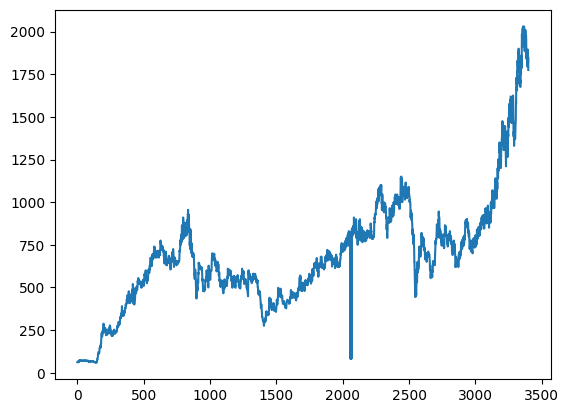

In [8]:
plt.plot(df.Close)

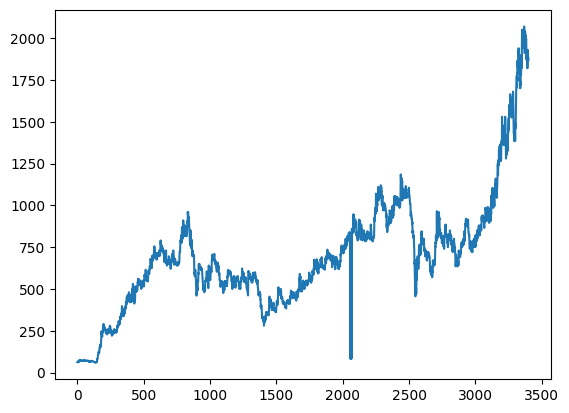

In [9]:
plt.plot(df.High)

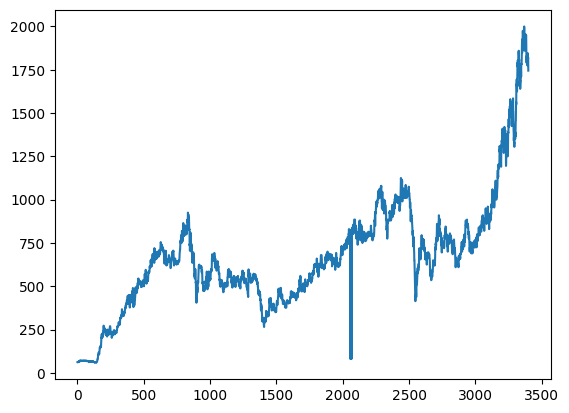

In [10]:
plt.plot(df.Low)

In [11]:
moving_average = df.Close.rolling(100).mean()
moving_average

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3394    1805.35
3395    1809.45
3396    1813.30
3397    1817.70
3398    1821.75
Name: Close, Length: 3399, dtype: float64

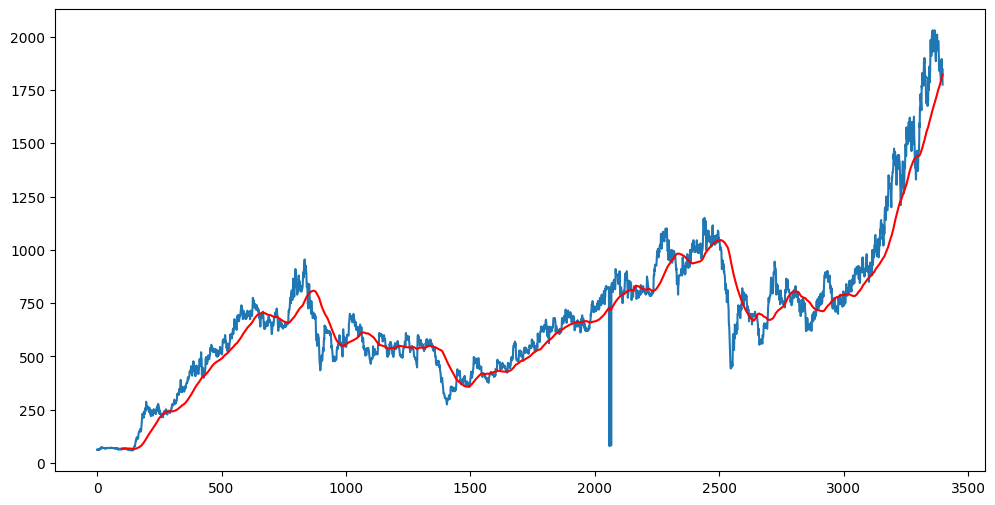

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moving_average,color='red')
plt.show()

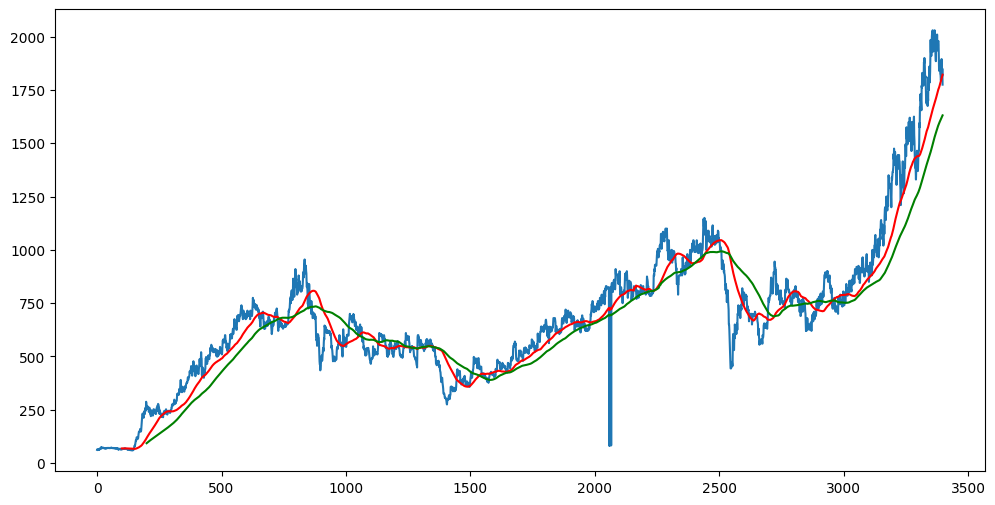

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moving_average,color='red')
plt.plot(df.Close.rolling(200).mean(),color='green')
plt.show()

In [14]:
df.shape

(3399, 5)

## Data Preparation

In [15]:
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [16]:
train_data.shape

(2379, 1)

In [17]:
test_data.shape

(1020, 1)

In [18]:
train_data.head()

,Close
0,62.0
1,65.0
2,63.0
3,63.0
4,64.0


In [19]:
test_data.head()

,Close
2379,945.0
2380,925.0
2381,920.0
2382,945.0
2383,1000.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


In [21]:
train_data_array = scaler.fit_transform(train_data)
train_data_array

array([[0.00192308],
       [0.00480769],
       [0.00288462],
       ...,
       [0.82211538],
       [0.82692308],
       [0.86538462]])

In [22]:
X_train = []
y_train = []


for i in range(100, train_data_array.shape[0]):
    X_train.append(train_data_array[i-100:i])
    y_train.append(train_data_array[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [23]:
X_train

array([[[0.00192308],
        [0.00480769],
        [0.00288462],
        ...,
        [0.00288462],
        [0.00480769],
        [0.00480769]],

       [[0.00480769],
        [0.00288462],
        [0.00288462],
        ...,
        [0.00480769],
        [0.00480769],
        [0.00480769]],

       [[0.00288462],
        [0.00288462],
        [0.00384615],
        ...,
        [0.00480769],
        [0.00480769],
        [0.00480769]],

       ...,

       [[0.95673077],
        [0.94711538],
        [0.94711538],
        ...,
        [0.875     ],
        [0.84134615],
        [0.82692308]],

       [[0.94711538],
        [0.94711538],
        [0.94711538],
        ...,
        [0.84134615],
        [0.82692308],
        [0.82211538]],

       [[0.94711538],
        [0.94711538],
        [0.94230769],
        ...,
        [0.82692308],
        [0.82211538],
        [0.82692308]]])

## Modeling

In [24]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units=100,activation='relu',return_sequences= True , input_shape= (X_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,activation='relu',return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           30200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
from keras.callbacks import ModelCheckpoint
# This will save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[checkpoint])


Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.0428
Epoch 1: val_loss improved from inf to 0.02164, saving model to best_model.h5
57/57 [==============================] - 51s 711ms/step - loss: 0.0428 - val_loss: 0.0216
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - ETA: 0s - loss: 0.0090
Epoch 2: val_loss improved from 0.02164 to 0.00735, saving model to best_model.h5
57/57 [==============================] - 40s 708ms/step - loss: 0.0090 - val_loss: 0.0074
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 0.0075
Epoch 3: val_loss did not improve from 0.00735
57/57 [==============================] - 39s 690ms/step - loss: 0.0075 - val_loss: 0.0272
Epoch 4/50
57/57 [==============================] - ETA: 0s - loss: 0.0071
Epoch 4: val_loss did not improve from 0.00735
57/57 [==============================] - 39s 693ms/step - loss: 0.0071 - val_loss: 0.0107
Epoch 5/50
57/57 [==============================] - ETA: 0s - loss: 0.0060
Epoch 5: val_loss did not improve from 0.00735
57/57 [==============================] - 41s 724ms/step - loss: 0.0060 - val_loss: 0.0149
Epoch 6/50
57/57 [==============================] - ETA: 0s - loss: 0.0055
Epoch 6: val_loss did not improve from 0.00735
57/57 

## Evaluating Model

In [28]:
test_data.head()

,Close
2379,945.0
2380,925.0
2381,920.0
2382,945.0
2383,1000.0


In [29]:
past_100_days = train_data.tail(100)

In [30]:
final_df = past_100_days.append(test_data,ignore_index=True)
final_df.head()

<ipython-input-30-076f1c1b4acf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_data,ignore_index=True)


,Close
0,1045.0
1,1040.0
2,1060.0
3,1060.0
4,1075.0


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.37894073],
       [0.37578815],
       [0.38839849],
       ...,
       [0.86443884],
       [0.88650694],
       [0.83921816]])

In [32]:
input_data.shape

(1120, 1)

In [33]:
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

X_test , y_test = np.array(X_test) , np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(1020, 100, 1)
(1020,)


In [34]:
from keras.models import load_model
loaded_model = load_model('/content/best_model.h5')

In [35]:
# Make prediction using the trained model
y_predicted =loaded_model(X_test)

In [36]:
y_predicted.shape

TensorShape([1020, 1])

In [37]:
y_test

array([0.31588903, 0.30327869, 0.3001261 , ..., 0.86443884, 0.88650694,
       0.83921816])

In [38]:
scaler.scale_

array([0.00063052])

In [39]:
scale_factor = 1/0.00251232
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

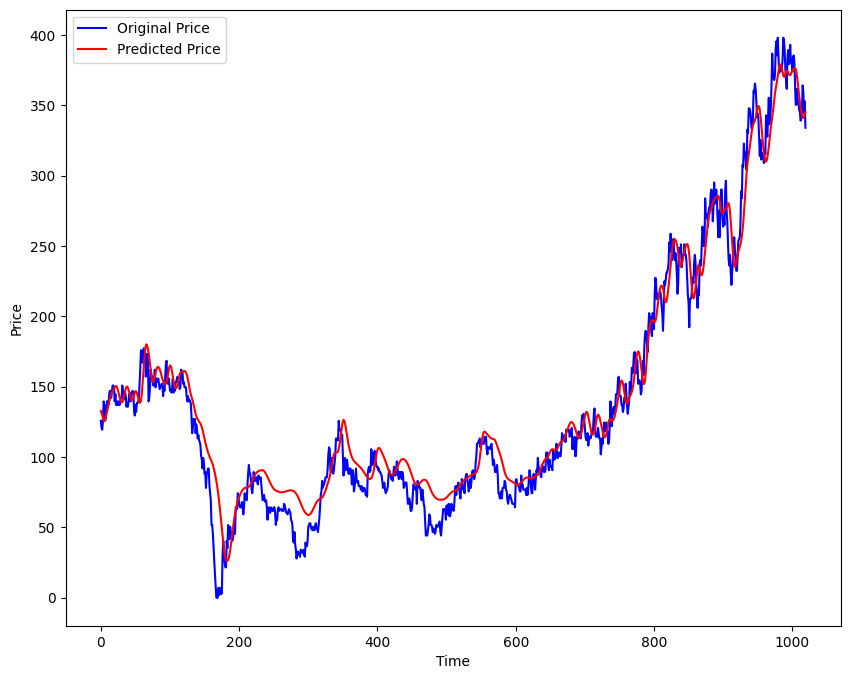

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()